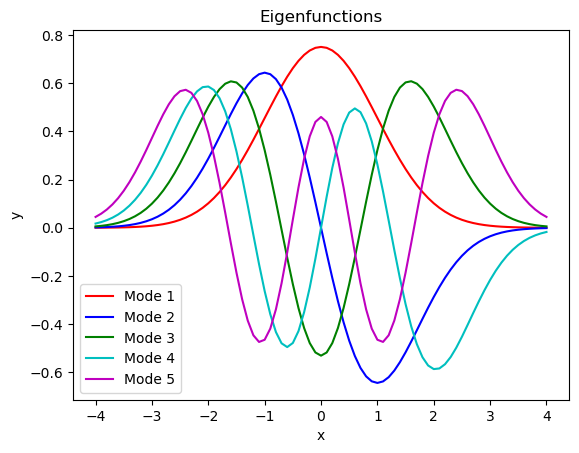

Eigenvalues: [0.9997351033613083, 2.999002601020038, 4.998463047854603, 6.997580946795643, 8.996253813616933]
Eigenfunctions stored in array format.
(81, 5)
[[2.52638135e-04 1.45263285e-03 5.65791031e-03 1.74251499e-02
  4.49739350e-02]
 [3.74361154e-04 2.08091497e-03 7.87411633e-03 2.34945618e-02
  5.85286297e-02]
 [5.49693592e-04 2.96478464e-03 1.08974131e-02 3.14959748e-02
  7.57134026e-02]
 [7.99574272e-04 4.19028063e-03 1.49550169e-02 4.18500927e-02
  9.70305188e-02]
 [1.15147827e-03 5.86546311e-03 2.03156259e-02 5.50071664e-02
  1.22893334e-01]
 [1.64186824e-03 8.12655207e-03 2.72920340e-02 7.14287816e-02
  1.53601132e-01]
 [2.31861693e-03 1.11444525e-02 3.62571791e-02 9.16073677e-02
  1.89281301e-01]
 [3.24129939e-03 1.51206909e-02 4.76086567e-02 1.15976002e-01
  2.29812190e-01]
 [4.48498071e-03 2.02874805e-02 6.17600441e-02 1.44840285e-01
  2.74657962e-01]
 [6.14581779e-03 2.69273203e-02 7.91314283e-02 1.78373615e-01
  3.22846351e-01]
 [8.33932660e-03 3.53568220e-02 1.00165634e

In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def shoot2(x, y, n0, epsilon):
    return [y[1], (x**2 - epsilon) * y[0]]

tol = 1e-4 
col = ['r', 'b', 'g', 'c', 'm']  
n0 = 0.2  
xp = [-4, 4]  # boundary points
xshoot = np.linspace(xp[0], xp[1], 81)  # shooting range

eigenvalues = []  
eigenfunctions = []  

epsilon_start = n0 

for modes in range(1, 6):  # begin mode loop
    epsilon = epsilon_start
    x0 = [1, np.sqrt(xp[1]**2 - epsilon)]
    depsilon = 0.1  # default step size for epsilon

    for _ in range(1000):  # begin convergence loop for epsilon
        y1 = solve_ivp(shoot2, xp, x0, t_eval = xshoot, args=(n0, epsilon)) 

        y1 = y1.y.T
        # check for convergence of boundary conditions
        if abs(y1[-1, 1] + np.sqrt(xp[1]**2 - epsilon) * y1[-1, 0]) < tol:
            eigenvalues.append(epsilon) 
            break  

        if (-1) ** (modes + 1) * (y1[-1, 1] + np.sqrt(xp[1]**2 - epsilon) * y1[-1, 0]) > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon / 2
            depsilon /= 2

    epsilon_start = epsilon + 2  
    norm = np.trapz(y1[:, 0] ** 2, xshoot)  # normalization
    eigen_norm = y1[:,0]/np.sqrt(norm)
    eigenfunctions.append(eigen_norm) 
    abs_eigenfunctions = np.column_stack([np.abs(ef) for ef in eigenfunctions])
    plt.plot(xshoot, y1[:, 0] / np.sqrt(norm), col[modes - 1], label=f"Mode {modes}") 

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Eigenfunctions')
plt.show()

# Display stored eigenvalues and eigenfunctions

A1 = abs_eigenfunctions
A2 = eigenvalues

print("Eigenvalues:", A2)
print("Eigenfunctions stored in array format.")
print(np.shape(A1))
print(A1)


In [5]:
import numpy as np

er = np.abs(2.52638135e-04 - 5.25330699e-04)
print(er)

0.00027269256399999997
